In [319]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [320]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [321]:
# y_data = data_df[['Survived']]
# y_data.head(3)

In [322]:
# pclass sibsp parch sex age 


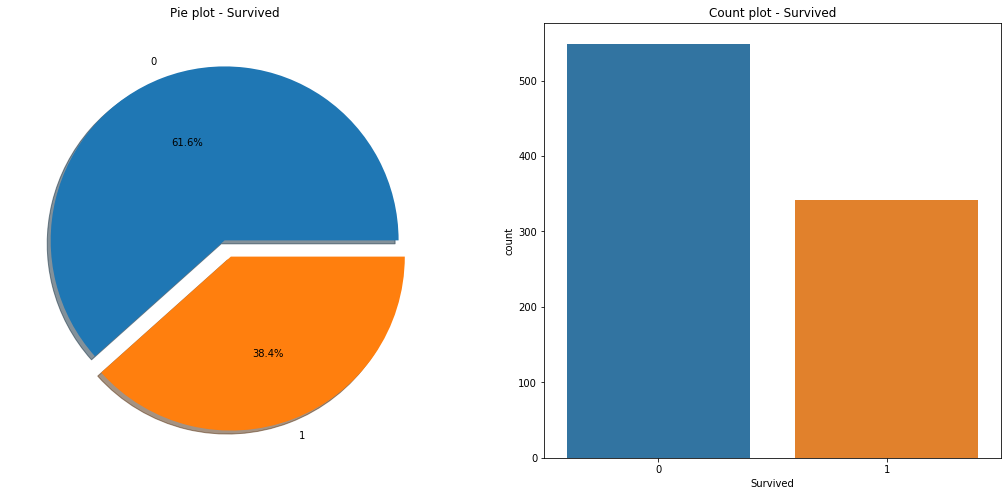

In [323]:
import seaborn as sns
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data_df, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [324]:
pd.crosstab(data_df['Pclass'], data_df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


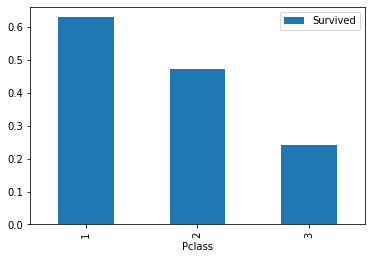

In [325]:
data_df[['Pclass', 'Survived']].groupby(
    ['Pclass'], 
    as_index=True).mean().sort_values(
    by='Survived', 
    ascending=False).plot.bar()

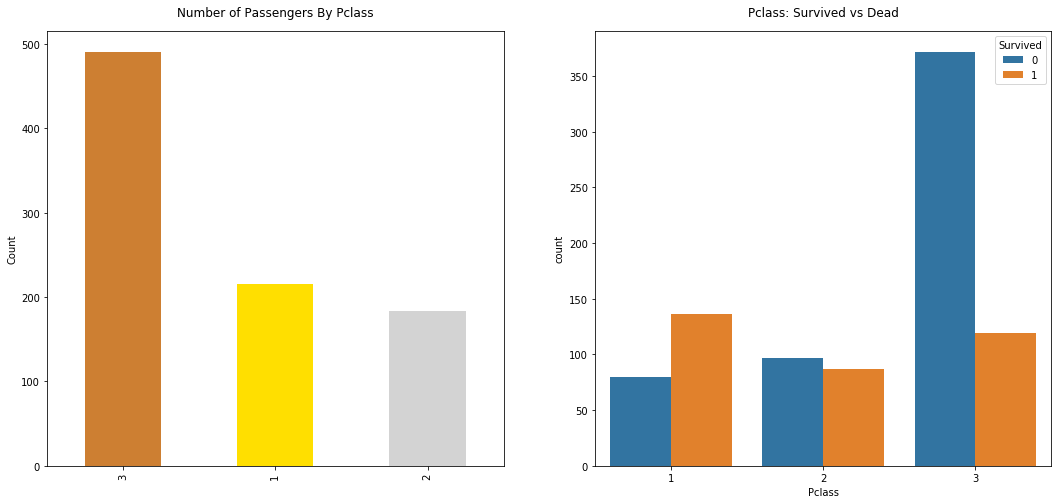

In [326]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data_df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

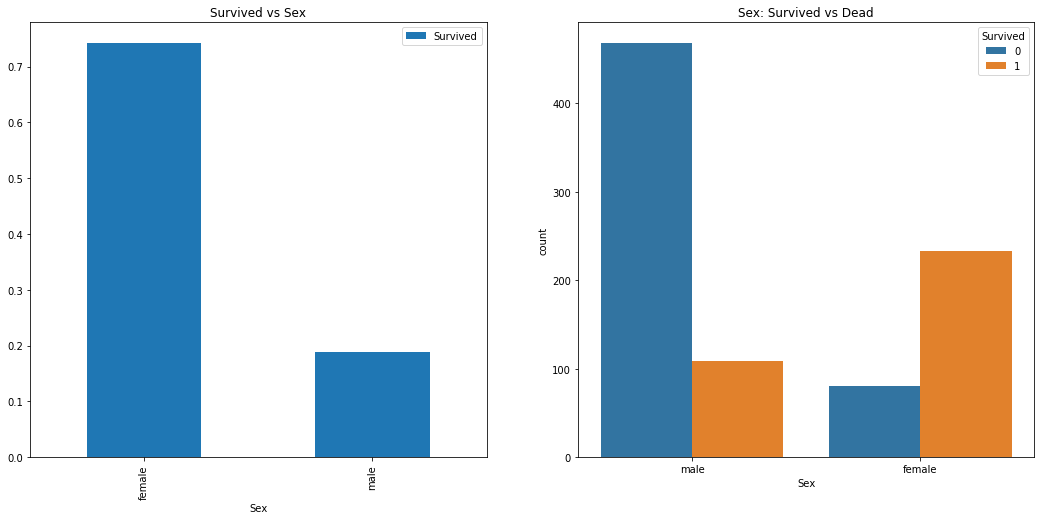

In [327]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data_df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data_df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [328]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(data_df['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(data_df['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(data_df['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


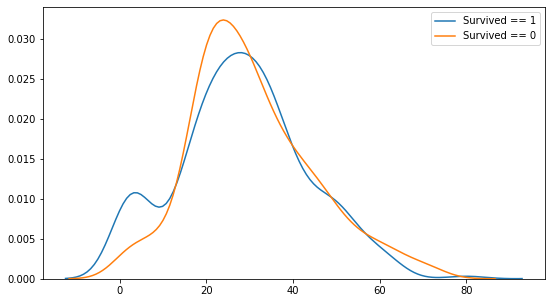

In [329]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(data_df[data_df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(data_df[data_df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [330]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [331]:
# data_df['FamilySize'] = data_df['SibSp'] + data_df['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [332]:
# f,ax=plt.subplots(1, 3, figsize=(40,10))
# sns.countplot('FamilySize', data=data_df, ax=ax[0])
# ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# sns.countplot('FamilySize', hue='Survived', data=data_df, ax=ax[1])
# ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

# data_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
# ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

# plt.subplots_adjust(wspace=0.2, hspace=0.5)
# plt.show()

In [333]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [334]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [335]:

del data_df['Survived']
x_data = data_df.copy()
x_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [336]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [337]:
# 성별 male/female 0/1
x_data['Sex'] = x_data['Sex'].apply(lambda x: 0 if x == 'male' else 1 )

x_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [338]:
# null 값인 row 수
x_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [339]:
x_data['Age'].isnull().sum()

177

In [340]:
# # 기본적인 결측치 채우는 방법
mean_age = x_data['Age'].median(skipna=True)
x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)


In [341]:
x_data['Age'].isnull().sum()

0

In [343]:
del_list = ["Name", "Fare",'Ticket','Embarked','PassengerId','Cabin']

x_data.drop(labels = del_list, axis = 1, inplace = True)

x_data

KeyError: "['Name' 'Fare' 'Ticket' 'Embarked' 'PassengerId' 'Cabin'] not found in axis"

In [344]:
x_data

,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0
...,...,...,...,...,...
886,2,0,27.0,0,0
887,1,1,19.0,0,0
888,3,1,28.0,1,2
889,1,0,26.0,0,0


In [345]:
x_data.loc[ x_data['Age'] <= 10, 'Age_group'] = 0
x_data.loc[(x_data['Age'] > 10) & (x_data['Age'] <= 16), 'Age_group'] = 1
x_data.loc[(x_data['Age'] > 16) & (x_data['Age'] <= 20), 'Age_group'] = 2
x_data.loc[(x_data['Age'] > 20) & (x_data['Age'] <= 26), 'Age_group'] = 3
x_data.loc[(x_data['Age'] > 26) & (x_data['Age'] <= 30), 'Age_group'] = 4
x_data.loc[(x_data['Age'] > 30) & (x_data['Age'] <= 36), 'Age_group'] = 5
x_data.loc[(x_data['Age'] > 36) & (x_data['Age'] <= 40), 'Age_group'] = 6
x_data.loc[(x_data['Age'] > 40) & (x_data['Age'] <= 46), 'Age_group'] = 7
x_data.loc[(x_data['Age'] > 46) & (x_data['Age'] <= 50), 'Age_group'] = 8
x_data.loc[(x_data['Age'] > 50) & (x_data['Age'] <= 60), 'Age_group'] = 9
x_data.loc[ x_data['Age'] > 60, 'Age_group'] = 10

x_data

,Pclass,Sex,Age,SibSp,Parch,Age_group
0,3,0,22.0,1,0,3.0
1,1,1,38.0,1,0,6.0
2,3,1,26.0,0,0,3.0
3,1,1,35.0,1,0,5.0
4,3,0,35.0,0,0,5.0
...,...,...,...,...,...,...
886,2,0,27.0,0,0,4.0
887,1,1,19.0,0,0,2.0
888,3,1,28.0,1,2,4.0
889,1,0,26.0,0,0,3.0


In [308]:
x_data["Age_group"]=x_data["Age_group"].astype("int")
x_data["Age"]=x_data["Age"].astype("int")

In [309]:
del x_data['Age']
x_data

,Pclass,Sex,SibSp,Parch,Age_group
0,3,0,1,0,3
1,1,1,1,0,6
2,3,1,0,0,3
3,1,1,1,0,5
4,3,0,0,0,5
...,...,...,...,...,...
886,2,0,0,0,4
887,1,1,0,0,2
888,3,1,1,2,4
889,1,0,0,0,3


In [310]:
del x_data['Parch']

In [311]:
x_data

,Pclass,Sex,SibSp,Age_group
0,3,0,1,3
1,1,1,1,6
2,3,1,0,3
3,1,1,1,5
4,3,0,0,5
...,...,...,...,...
886,2,0,0,4
887,1,1,0,2
888,3,1,1,4
889,1,0,0,3


<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data,test_size=0.3, random_state=0)


<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

In [313]:
svc = SVC(probability=True)

<br>

## 4. Train the model

In [314]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

In [315]:
print("Accuracy on Training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test, y_test)))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Accuracy on Training set: 0.838
Accuracy on Test set: 0.817
(623, 4)
(268, 4)
(623, 1)
(268, 1)


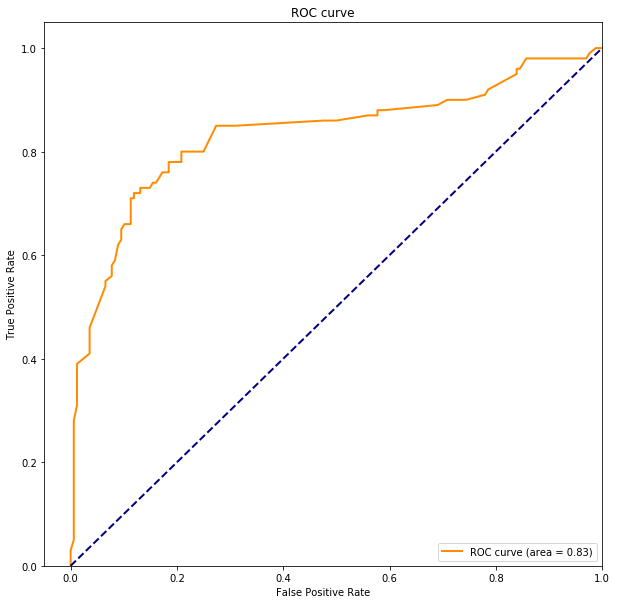

Accuracy on Training set: 0.838
Accuracy on Test set: 0.817


In [317]:
#시각화
from sklearn.metrics import roc_curve, auc

# pred_test = svc.predict(X_test) # Predict 'probability'  확률 알려준다
pred_test_proba = svc.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test_proba[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test, y_test)))

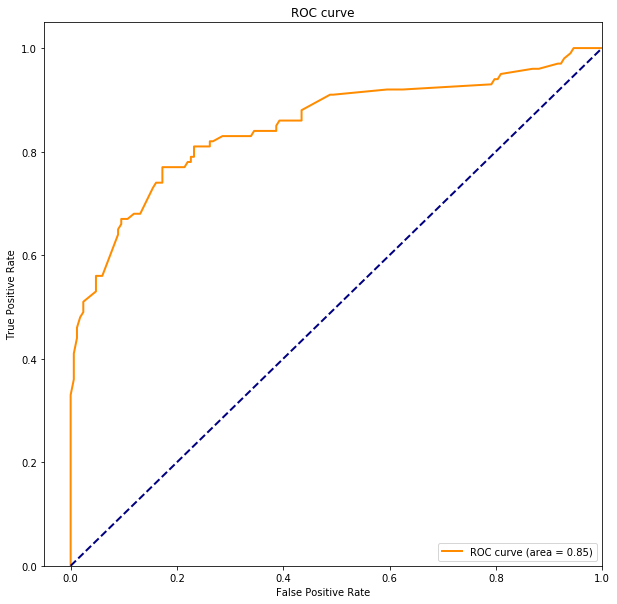

Accuracy train:  0.7865168539325843
Accuracy test:  0.8022388059701493


In [284]:
#시각화
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import roc_curve, auc

model = linear_model.LogisticRegression(solver='lbfgs') # 로지스틱회귀
model.fit(X_train, y_train)


pred_test = model.predict_proba(X_test) # Predict 'probability'  확률 알려준다


fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

from sklearn.metrics import accuracy_score # accuracy

print('Accuracy train: ', accuracy_score(model.predict(X_train), y_train))
print('Accuracy test: ', accuracy_score(model.predict(X_test), y_test))

In [279]:
# XGBoost
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [283]:
x_data = x_data.astype(np.float32)
x_data

,Pclass,Sex,SibSp,Age_group
0,3.0,0.0,1.0,3.0
1,1.0,1.0,1.0,6.0
2,3.0,1.0,0.0,3.0
3,1.0,1.0,1.0,5.0
4,3.0,0.0,0.0,5.0
...,...,...,...,...
886,2.0,0.0,0.0,4.0
887,1.0,1.0,0.0,2.0
888,3.0,1.0,1.0,4.0
889,1.0,0.0,0.0,3.0


## SVM 위한 전처리

In [233]:
min_on_training = X_train.min(axis=0) # 열마다의 최소값 계산
range_on_training = (X_train - min_on_training).max(axis=0) # 분모에 해당 
X_train_scaled = (X_train - min_on_training) / range_on_training # Min-max scaling (0~1)

print("열마다의 최소값\n{}".format(X_train_scaled.min(axis=0)))
print("열마다의 최대값\n {}".format(X_train_scaled.max(axis=0)))

열마다의 최소값
Pclass       0.0
Sex          0.0
Age          0.0
SibSp        0.0
Parch        0.0
Age_group    0.0
dtype: float64
열마다의 최대값
 Pclass       1.0
Sex          1.0
Age          1.0
SibSp        1.0
Parch        1.0
Age_group    1.0
dtype: float64


In [234]:
df = pd.DataFrame(X_train_scaled)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Age_group
857,0.0,0.0,0.6375,0.000,0.000000,0.9
52,0.0,1.0,0.6125,0.125,0.000000,0.8
386,1.0,0.0,0.0125,0.625,0.333333,0.0
124,0.0,0.0,0.6750,0.000,0.166667,0.9
578,1.0,1.0,0.3500,0.125,0.000000,0.4


In [235]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Age_group
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.643660,0.345104,0.369081,0.066413,0.065543,0.423274
std,0.420328,0.475784,0.163171,0.145361,0.138681,0.234255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.287500,0.000000,0.000000,0.300000
50%,1.000000,0.000000,0.350000,0.000000,0.000000,0.400000
75%,1.000000,1.000000,0.450000,0.125000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [236]:
# 테스트 데이터에도 같은 계산 적용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [237]:
# # 혹은 데이터의 범위를 0~1 사이로 맞추는 Min-max Normalization(정규화) 대신, 
# # 평균이 0 & 표준편차가 1 이 되게끔 Standardization(표준화)를 적용할 수도 있습니다.
# # 이 때는 sklearn.preprocessing.StandardScaler 를 간편하게 활용할 수 있습니다.

from sklearn.preprocessing import StandardScaler  # (sklearn.preprocessing.MinMaxScaler is also available)

sc = StandardScaler() 
# sc = MinMaxScaler()
sc.fit(X_train) # X_train 의 평균과 표준편차를 구함

# As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

df = pd.DataFrame(X_train_scaled)
df.describe()

,0,1,2,3,4,5
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,2.557255e-17,-6.985673e-17,-4.989766e-17,1.202890e-16,2.044022e-16,8.197473e-17
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-1.532556e+00,-7.259206e-01,-2.263752e+00,-4.572460e-01,-4.729977e-01,-1.808348e+00
25%,-9.373053e-01,-7.259206e-01,-5.003759e-01,-4.572460e-01,-4.729977e-01,-5.266633e-01
50%,8.484476e-01,-7.259206e-01,-1.170333e-01,-4.572460e-01,-4.729977e-01,-9.943512e-02
75%,8.484476e-01,1.377561e+00,4.963148e-01,4.033711e-01,-4.729977e-01,3.277930e-01
max,8.484476e-01,1.377561e+00,3.869730e+00,6.427691e+00,6.743595e+00,2.463934e+00


Accuracy on Training set: 0.839
Accuracy on Test set: 0.817


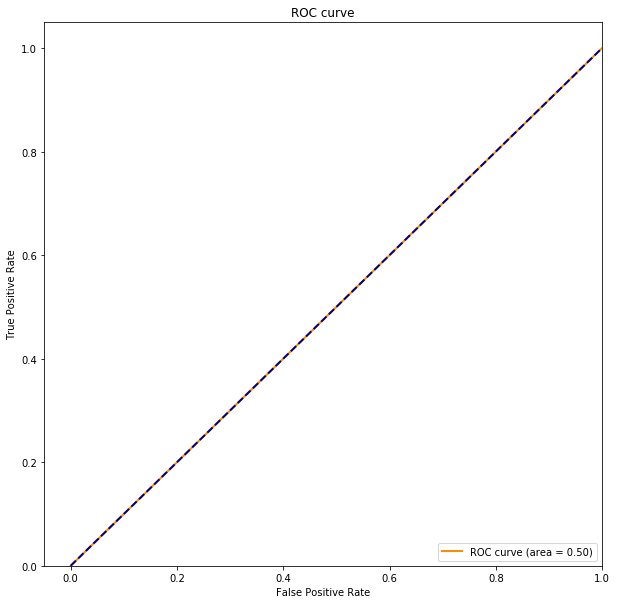

In [245]:
# from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

#시각화
from sklearn.metrics import roc_curve, auc

pred_test = svc.predict(X_test) # Predict 'probability'  확률 알려준다


fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

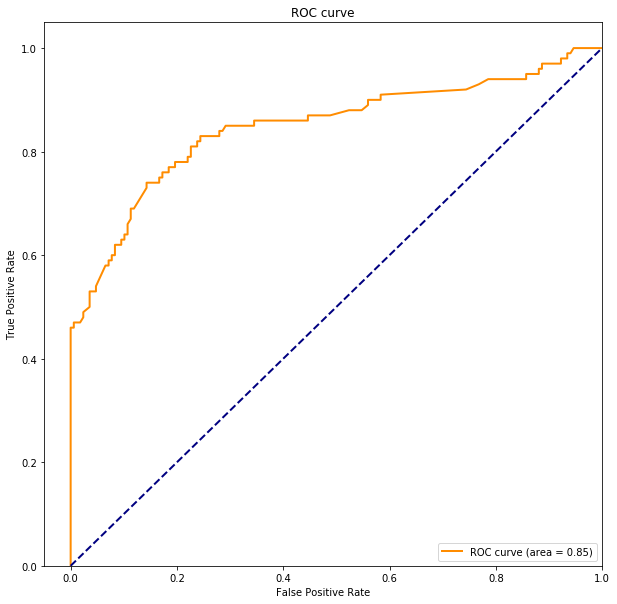

Accuracy train:  0.7913322632423756
Accuracy test:  0.8059701492537313


In [240]:
#시각화
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import roc_curve, auc

model = linear_model.LogisticRegression(solver='lbfgs') # 로지스틱회귀
model.fit(X_train, y_train)


pred_test = model.predict_proba(X_test) # Predict 'probability'  확률 알려준다


fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

from sklearn.metrics import accuracy_score # accuracy

print('Accuracy train: ', accuracy_score(model.predict(X_train), y_train))
print('Accuracy test: ', accuracy_score(model.predict(X_test), y_test))

In [241]:
# C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음

svc = SVC(C=1000) 
svc.fit(X_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))



Accuracy on Training set: 0.884
Accuracy on Test set: 0.806


In [242]:
# C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음

svc = SVC(C=1000, gamma=0.1)
svc.fit(X_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on Training set: 0.872
Accuracy on Test set: 0.817


## GridSearch

In [243]:
from sklearn.model_selection import GridSearchCV

# 아래 param_grid dict 의 C & gamma 에 후보 Hyper-params 값들을 리스트업합니다.
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 
             'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
# refit : 찾아진 가장 좋은 params로 estimator를 setting할 지 여부 (setting해줘야 곧바로 predict가 가능)
# verbose : 설명의 자세한 정도 (verbose를 3과 같이 바꿔보시면 더 자세하게 매 param set 마다의 결과를 확인할 수 있습니다.)

# grid.fit(X_train, y_train)
grid.fit(X_train_scaled, y_train)
print('The best parameters are ', grid.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


In [244]:
from sklearn.metrics import classification_report

grid_predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, grid_predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(grid.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(grid.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.77      0.72      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

Accuracy on Training set: 0.838
Accuracy on Test set: 0.817
